Gradient Descent: Logistic Regression Example
======

Suppose we have 2-dimensional data, where there are two classes. Both the "positive" class and the "negative" class have Gaussian distributions.

Mean(PositiveClass) = [2, 2]  
Mean(NegativeClass) = [−2, −2]  
Covariance(PositiveClass) = Covariance(NegativeClass) = [ [ 0.1, 0.0], [ 0.0, 0.1 ] ] 


---
Create the Data
------

In [1]:
import numpy as np

proportion_positive = 0.5
proportion_negative = 1 - proportion_positive

count = 1000

mu_positive = np.array([  2,  2 ])
mu_negative = np.array([ -2, -2 ])
Sigma = np.array([ [ 0.1, 0 ], [ 0, 0.1 ] ])

Xpos = np.random.multivariate_normal(mean = mu_positive,
                                     cov = Sigma,
                                     size = int(proportion_positive * count))
Xneg = np.random.multivariate_normal(mean = mu_negative,
                                     cov = Sigma,
                                     size = int(proportion_negative * count))

X = np.concatenate((Xpos, Xneg), axis = 0).astype("float32")
Y = np.array([1]*int(proportion_positive * count) + [0]*int(proportion_negative * count)).astype("float32")
index = np.arange(count)
np.random.shuffle(index)

trnCount = int(0.8 * count)
valCount = int(0.1 * count)
tstCount = int(0.1 * count)

trnX = X[index[:trnCount]]
trnY = Y[index[:trnCount]]
valX = X[index[trnCount:(trnCount+valCount)]]
valY = Y[index[trnCount:(trnCount+valCount)]]
tstX = X[index[(trnCount+valCount):(trnCount+valCount+tstCount)]]
tstY = Y[index[(trnCount+valCount):(trnCount+valCount+tstCount)]]

print("trn shapes:", trnX.shape, trnY.shape, sep = "\t")
print("val shapes:", valX.shape, valY.shape, sep = "\t")
print("tst shapes:", tstX.shape, tstY.shape, sep = "\t")

trn shapes:	(800, 2)	(800,)
val shapes:	(100, 2)	(100,)
tst shapes:	(100, 2)	(100,)


---
Plot the Data
------

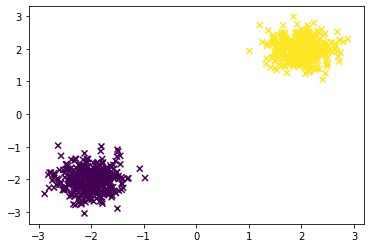

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(trnX[:,0], trnX[:,1], c = trnY, marker = 'x')
plt.show()

---
Create the Error Surface
------

In [3]:
from scipy.integrate import dblquad

Sigma_Inverse = np.linalg.inv(Sigma)
norm = np.sqrt(((np.float(2) * np.pi)**2) * np.linalg.det(Sigma))

def loss(y, x, w):
    observation = np.array([ x, y ])
    probability_positive = np.float(1.0 / (1.0 + np.exp( - np.matmul(np.transpose(observation), w))))
    probability_negative = np.float(1.0 - probability_positive)
    difference_positive = observation - mu_positive
    density_positive = np.exp(-0.5 \
                              * np.matmul(np.matmul(np.transpose(difference_positive), Sigma_Inverse), \
                                          difference_positive) \
                             ) / norm
    difference_negative = observation - mu_negative
    density_negative = np.exp(-0.5 \
                              * np.matmul(np.matmul(np.transpose(difference_negative), Sigma_Inverse), \
                                          difference_negative) \
                             ) / norm
    return (  proportion_positive * density_positive * -np.log(probability_positive) \
            + proportion_negative * density_negative * -np.log(probability_negative))

X = np.linspace(-2, 2, 11)
Y = np.linspace(-2, 2, 11)
X, Y = np.meshgrid(X, Y)
Z = np.zeros((Y.shape[0], X.shape[1]))
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        weights = np.array([ X[i,j], Y[i,j] ])    # bias = 0
        Z[i,j] = dblquad(loss, -6, 6, -6, 6, args = [ weights ])[0]
np.save("X.npy", X)
np.save("Y.npy", Y)
np.save("Z.npy", Z)

---
Plot the Error Surface
------

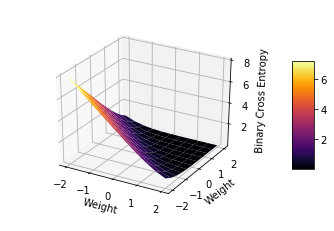

In [4]:
X = np.load("X.npy")
Y = np.load("Y.npy")
Z = np.load("Z.npy")
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
fig = plt.figure()
ax = fig.gca(projection = "3d")
surf = ax.plot_surface(X, Y, Z, cmap = cm.inferno, linewidth = 0, antialiased = True)
ax.set_xlabel("Weight")
ax.set_ylabel("Weight")
ax.set_zlabel("Binary Cross Entropy")
ax.dist = 12
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()

---
What is the lowest point on the error surface?
------

In [5]:
np.set_printoptions(precision=6)
np.set_printoptions(linewidth=120)
np.set_printoptions(suppress=True)

Z = np.load("Z.npy")
print("Cross Entropy Matrix:")
print("w = (-2, -2) appears in the lower, left-hand corner")
print("w = (2, 2) appears in the upper, right-hand corner")
print(np.rot90(Z))

Cross Entropy Matrix:
w = (-2, -2) appears in the lower, left-hand corner
w = (2, 2) appears in the upper, right-hand corner
[[0.785074 0.438175 0.222425 0.105541 0.048409 0.022009 0.010056 0.004646 0.002177 0.001035 0.0005  ]
 [1.238175 0.753609 0.412705 0.20648  0.09757  0.045009 0.020702 0.009594 0.004501 0.002142 0.001035]
 [1.822425 1.212705 0.72796  0.393024 0.195144 0.092431 0.043057 0.020074 0.009445 0.004501 0.002177]
 [2.505541 1.80648  1.193024 0.708901 0.379609 0.188384 0.089919 0.042421 0.020074 0.009594 0.004646]
 [3.248409 2.49757  1.795144 1.179609 0.697131 0.37281  0.18614  0.089919 0.043057 0.020702 0.010056]
 [4.022009 3.245009 2.492431 1.788384 1.17281  0.693147 0.37281  0.188384 0.092431 0.045009 0.022009]
 [4.810056 4.020702 3.243057 2.489919 1.78614  1.17281  0.697131 0.379609 0.195144 0.09757  0.048409]
 [5.604646 4.809594 4.020074 3.242421 2.489919 1.788384 1.179609 0.708901 0.393024 0.20648  0.105541]
 [6.402177 5.604501 4.809445 4.020074 3.243057 2.492431 1.7

---
Create the Model
------

In [6]:
import tensorflow
from tensorflow.keras import models, layers, optimizers
tensorflow.random.set_seed(1)

model = models.Sequential()
model.add(layers.Dense(1, input_shape = (trnX.shape[1],), activation = "sigmoid"))
model.summary()
model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(), metrics = [ "accuracy" ])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


---
Prediction for a Single Example
------

In [7]:
old_weights = model.get_weights()
print(old_weights)
print(model.predict(trnX[:1]))

np1 = np.float32(1)
def sigmoid(x):
    np1 = np.float32(1)
    return np1 / (np1 + np.exp(-x))

prediction = sigmoid(trnX[0,0] * old_weights[0][0,0] + trnX[0,1] * old_weights[0][1,0] + old_weights[1][0])
print(prediction)

[array([[-0.947153],
       [ 1.13556 ]], dtype=float32), array([0.], dtype=float32)]
1/1 [==============================] - 1s 750ms/step
[[0.398588]]
0.3985879


---
Train on a Single Example
------

In [8]:
old_weights = model.get_weights()
model.fit(trnX[:1], trnY[:1], epochs = 1, batch_size = 1)
new_weights = model.get_weights()
print(new_weights[0] - old_weights[0])
print(new_weights[1] - old_weights[1])

1/1 [==============================] - 0s 136ms/step - loss: 0.5085 - accuracy: 1.0000
[[0.008184]
 [0.00827 ]]
[-0.003986]


In [9]:
activation = prediction
lr = model.optimizer.lr.numpy()    # learning rate
w0 = - lr * ((activation - trnY[0]) / (activation * (np1 - activation))) * (activation * (np1 - activation)) * trnX[0,0]
w1 = - lr * ((activation - trnY[0]) / (activation * (np1 - activation))) * (activation * (np1 - activation)) * trnX[0,1]
b = - lr * ((activation - trnY[0]) / (activation * (np1 - activation))) * (activation * (np1 - activation)) * np1
print(w0, w1, b)

0.008184188 0.008270171 -0.0039858785


---
Prediction for a Batch of Examples
------

In [10]:
old_weights = model.get_weights()
indices = slice(1, 5)
batch_size = indices.stop - indices.start
print(model.predict(trnX[indices]))
predictions = sigmoid(np.dot(trnX[indices], old_weights[0]) + old_weights[1][0])
print(predictions)

1/1 [==============================] - 0s 11ms/step
[[0.523822]
 [0.457339]
 [0.429834]
 [0.207518]]
[[0.523822]
 [0.457339]
 [0.429834]
 [0.207518]]


---
Train on a Batch of Examples
------

In [11]:
old_weights = model.get_weights()
model.fit(trnX[indices], trnY[indices], epochs = 1, batch_size = batch_size)
new_weights = model.get_weights()
print(new_weights[0] - old_weights[0])
print(new_weights[1] - old_weights[1])

1/1 [==============================] - 0s 93ms/step - loss: 0.5837 - accuracy: 0.7500
[[0.009454]
 [0.00829 ]]
[0.000954]


In [12]:
lr = model.optimizer.lr.numpy()    # learning rate
w_update = - lr * np.dot(np.transpose(trnX[indices]), (predictions - trnY[indices].reshape(batch_size, 1)) / (predictions * (np1 - predictions)) * (predictions * (1 - predictions))) / batch_size
b_update = - lr * np.dot(np.transpose(np.ones((batch_size, 1), dtype = "float32")), (predictions - trnY[indices].reshape(batch_size, 1)) / (predictions * (np1 - predictions)) * (predictions * (1 - predictions))) / batch_size
print(w_update, b_update)

[[0.009454]
 [0.00829 ]] [[0.000954]]


---
Train the Model
------

In [13]:
model = models.Sequential()
model.add(layers.Dense(1, input_shape = (trnX.shape[1],), activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(learning_rate = 0.01), metrics = [ "accuracy" ])
model.fit(trnX, trnY, validation_data = (valX, valY), epochs = 100)
print(model.get_weights())
model.evaluate(tstX, tstY)

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6031 - accuracy: 0.7350 - val_loss: 0.4223 - val_accuracy: 1.0000
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 1.0000 - val_loss: 0.2613 - val_accuracy: 1.0000
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 1.0000 - val_loss: 0.1842 - val_accuracy: 1.0000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 1.0000 - val_loss: 0.1407 - val_accuracy: 1.0000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1280 - accuracy: 1.0000 - val_loss: 0.1133 - val_accuracy: 1.0000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0888 - accuracy: 1.0000 - val_loss: 0.0811 - val_accuracy: 1.0000
Epoch 8/100
2

Epoch 59/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 60/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 61/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 62/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 63/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 64/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 65/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 

[0.005982154048979282, 1.0]

---
Question: What happens if we continue to let it train?
------

In [14]:
model.fit(trnX, trnY, validation_data = (valX, valY), epochs = 100)
print(model.get_weights())

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 8/100
2

Epoch 59/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 60/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 61/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 62/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 63/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 64/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 65/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 

In [15]:
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Dense(1, input_shape = (trnX.shape[1],), activation = "sigmoid", kernel_regularizer = regularizers.l2(0.1)))
model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(), metrics = [ "binary_crossentropy" ])
model.fit(trnX, trnY, validation_data = (valX, valY), epochs = 100)
print(model.get_weights())

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1729 - binary_crossentropy: 0.0723 - val_loss: 0.1709 - val_binary_crossentropy: 0.0709
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1714 - binary_crossentropy: 0.0720 - val_loss: 0.1695 - val_binary_crossentropy: 0.0707
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1702 - binary_crossentropy: 0.0718 - val_loss: 0.1683 - val_binary_crossentropy: 0.0705
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1690 - binary_crossentropy: 0.0716 - val_loss: 0.1673 - val_binary_crossentropy: 0.0704
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1679 - binary_crossentropy: 0.0714 - val_loss: 0.1663 - val_binary_crossentropy: 0.0702
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1670 - binary_crossentropy: 0.0713 - val_loss: 0.1654 - val_binary_crossentropy: 0.0701
Epoch 7/100
25/25 [===

25/25 [==============================] - 0s 2ms/step - loss: 0.1583 - binary_crossentropy: 0.0707 - val_loss: 0.1576 - val_binary_crossentropy: 0.0699
Epoch 52/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1583 - binary_crossentropy: 0.0707 - val_loss: 0.1576 - val_binary_crossentropy: 0.0699
Epoch 53/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1583 - binary_crossentropy: 0.0707 - val_loss: 0.1576 - val_binary_crossentropy: 0.0699
Epoch 54/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1583 - binary_crossentropy: 0.0707 - val_loss: 0.1576 - val_binary_crossentropy: 0.0699
Epoch 55/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1583 - binary_crossentropy: 0.0707 - val_loss: 0.1576 - val_binary_crossentropy: 0.0699
Epoch 56/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1583 - binary_crossentropy: 0.0707 - val_loss: 0.1576 - val_binary_crossentropy: 0.0699
Epoch 57/100
25/25 [=========

In [16]:
model.fit(trnX, trnY, validation_data = (valX, valY), epochs = 100)
print(model.get_weights())

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1582 - binary_crossentropy: 0.0707 - val_loss: 0.1575 - val_binary_crossentropy: 0.0700
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1582 - binary_crossentropy: 0.0707 - val_loss: 0.1575 - val_binary_crossentropy: 0.0700
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1582 - binary_crossentropy: 0.0707 - val_loss: 0.1575 - val_binary_crossentropy: 0.0700
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1582 - binary_crossentropy: 0.0707 - val_loss: 0.1575 - val_binary_crossentropy: 0.0700
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1582 - binary_crossentropy: 0.0707 - val_loss: 0.1575 - val_binary_crossentropy: 0.0700
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1582 - binary_crossentropy: 0.0707 - val_loss: 0.1575 - val_binary_crossentropy: 0.0700
Epoch 7/100
25/25 [===

25/25 [==============================] - 0s 2ms/step - loss: 0.1582 - binary_crossentropy: 0.0707 - val_loss: 0.1575 - val_binary_crossentropy: 0.0700
Epoch 52/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1582 - binary_crossentropy: 0.0707 - val_loss: 0.1575 - val_binary_crossentropy: 0.0700
Epoch 53/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1582 - binary_crossentropy: 0.0707 - val_loss: 0.1575 - val_binary_crossentropy: 0.0700
Epoch 54/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1582 - binary_crossentropy: 0.0707 - val_loss: 0.1575 - val_binary_crossentropy: 0.0700
Epoch 55/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1582 - binary_crossentropy: 0.0707 - val_loss: 0.1575 - val_binary_crossentropy: 0.0700
Epoch 56/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1582 - binary_crossentropy: 0.0707 - val_loss: 0.1575 - val_binary_crossentropy: 0.0700
Epoch 57/100
25/25 [=========